## 1. Problem Statement

### 1.1 Context
This dataset contains information about used cars listed on www.cardekho.com.

### 1.2 Content
So the dataset will be used to build a predictive model to predict the price of a used car based on its input features.

The features(columns) in the given dataset are as follows:

* Car_Name
* Year
* Selling_Price
* Present_Price
* Kms_Driven
* Fuel_Type
* Seller_Type
* Transmission
* Owner

## 2. Machine Learning problem

### 2.1 Data Overview

For this project:
1. The dataset has 301 records about the used cars sold.
2. Each record is for the transaction of one car.

#### Target Variable
* 'Selling_Price' - Price at which the car is being sold

#### Features of the data:
* 'Car_Name' - Name of the cars
* 'Year' - Year of the car when it was bought
* 'Present_Price - Price when car was purchased for first time
* 'Kms_Driven' - Number of Kilometres the car is driven
* 'Fuel_Type' - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* 'Seller_Type' - Tells if a Seller is Individual or a Dealer
* 'Transmission' - Gear transmission of the car (Automatic/Manual)
* 'Owner' - Number of previous owners of the car.

### 2.2 Mapping  ML problem

This is a __regression problem__, where given the above set of features, we need to predict the selling price of the used car. Following machine learning algorithms were used:

* 1) LinearRegression
* 2) Ridge Regression
* 3) Lasso Regression
* 4) RandomForestRegressor
* 5) XGBoostRegressor
* 6) DecisionTreeRegressor
* 7) KNeighborsRegressor
* 8) Support Vector Regressor
* 9) ExtraTreeRegressor

#### Finally we will create a stable and best performing model using voting method


### 2.3 Performance Metric (KPI)

**Since it is a regression problem, we will use the following regression metrics:**
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)


In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error as mae

#import xgboost
import os
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.dtypes[df.dtypes == 'object']

Car_Name        object
Fuel_Type       object
Seller_Type     object
Transmission    object
dtype: object

In [7]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


#### Inferences:
* Total 9 features
* Fuel_Type,Seller_Type, Transmission, Owner are the categorical feature

### Missing values

In [8]:
# Check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Inference:
No missing Values in any of the feature

In [9]:
# To get details and statistics of out dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


### Exploratory Data Analysis
### Distributions of Numeric Features

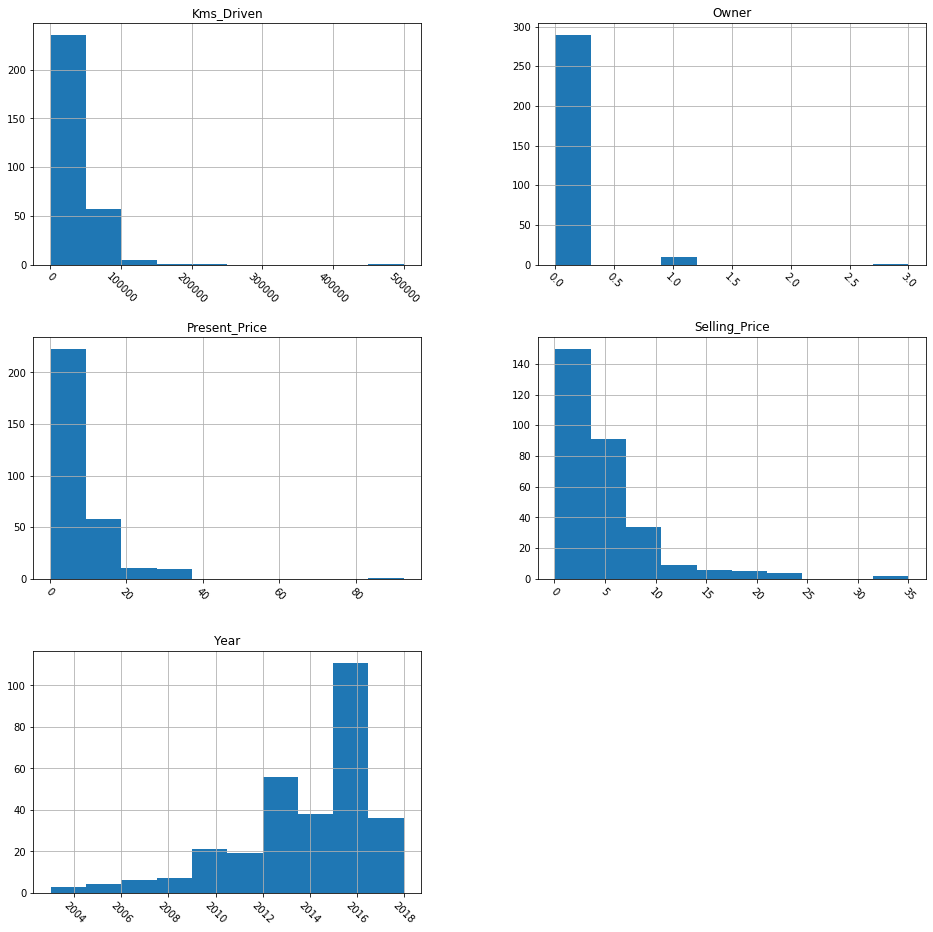

In [10]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

#### Inferences:
* Most of the kms driven are less than 1,00,000
* 0 is the first owners which contribute to maximum owners
* Current Price is going to be higher than selling price

### Distributions of categorical features
Display summary statistics for categorical features.

In [11]:
df.describe(include=['object'])

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


#### Inferences:
* Most frequent seller type is 'Dealer'
* Most frequent Fuel type is Petrol
* Most frequent transmission is manual

### Bar plots for categorical features

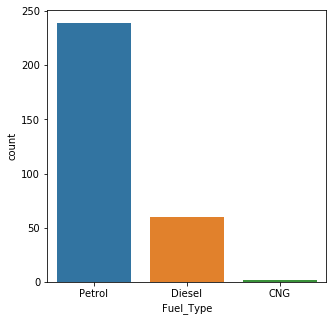

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x='Fuel_Type', data=df);

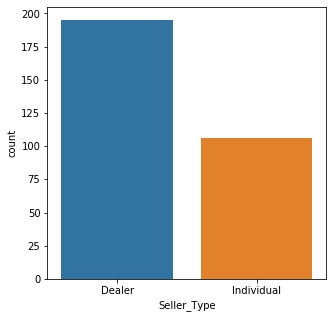

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='Seller_Type', data=df);

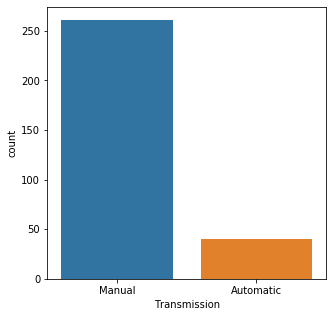

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='Transmission', data=df);

#### Inferences:
* We dont have any sparse class i.e. class with very less observations in any of the categorical feature

## Segmentation

Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

Segmenting the target variable by key categorical features.

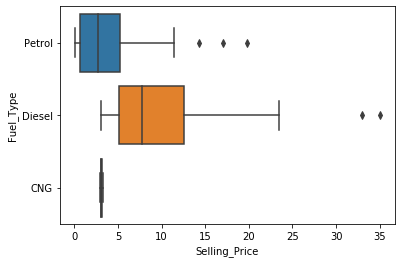

In [15]:
sns.boxplot(y='Fuel_Type', x='Selling_Price', data=df)

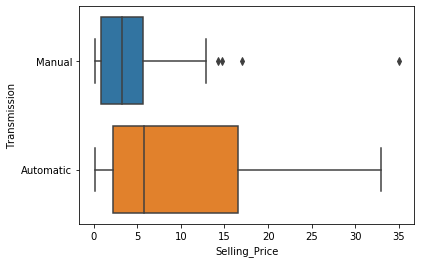

In [16]:
sns.boxplot(y='Transmission', x='Selling_Price', data=df)

#### Observations:
* In general, it looks like Automatic and diesel type car have higher selling Price

## Data Cleaning

In [17]:
df.shape

(301, 9)

In [18]:
# drop the duplicates
df = df.drop_duplicates()
print( df.shape )

(299, 9)


#### Create a derived feature from year column 
since the variable is only has integer values which dosent give any insight from data, also more the number of years higher will be the depreciation of car

#### Car name variable is not usefull for prediction, so drop it

In [19]:
df['Year'].dtype

dtype('int64')

In [20]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_dataset['Current_Year'] = 2020
final_dataset['Number_ofYear'] = final_dataset['Current_Year'] - final_dataset['Year']

In [21]:
# Current_year and Year not required now so drop those columns
final_dataset.drop(['Year'],axis = 1,inplace = True)
final_dataset.drop(['Current_Year'],axis = 1, inplace = True)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_ofYear
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Feature Engineering

#### Next looking for categorical features and convert them into numerical values : one-hot encoding

In [23]:
final_dataset = pd.get_dummies(final_dataset,drop_first = True)

In [24]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print('After one-hot encoding we obtain k-1 dummies out of k categorical levels by removing the first level')
print('Fuel_type has 3 categorical levels so we obtain 2 columns of dummies')

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]
After one-hot encoding we obtain k-1 dummies out of k categorical levels by removing the first level
Fuel_type has 3 categorical levels so we obtain 2 columns of dummies


In [25]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_ofYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


#### Check for coorelation in all the  features using pairplot

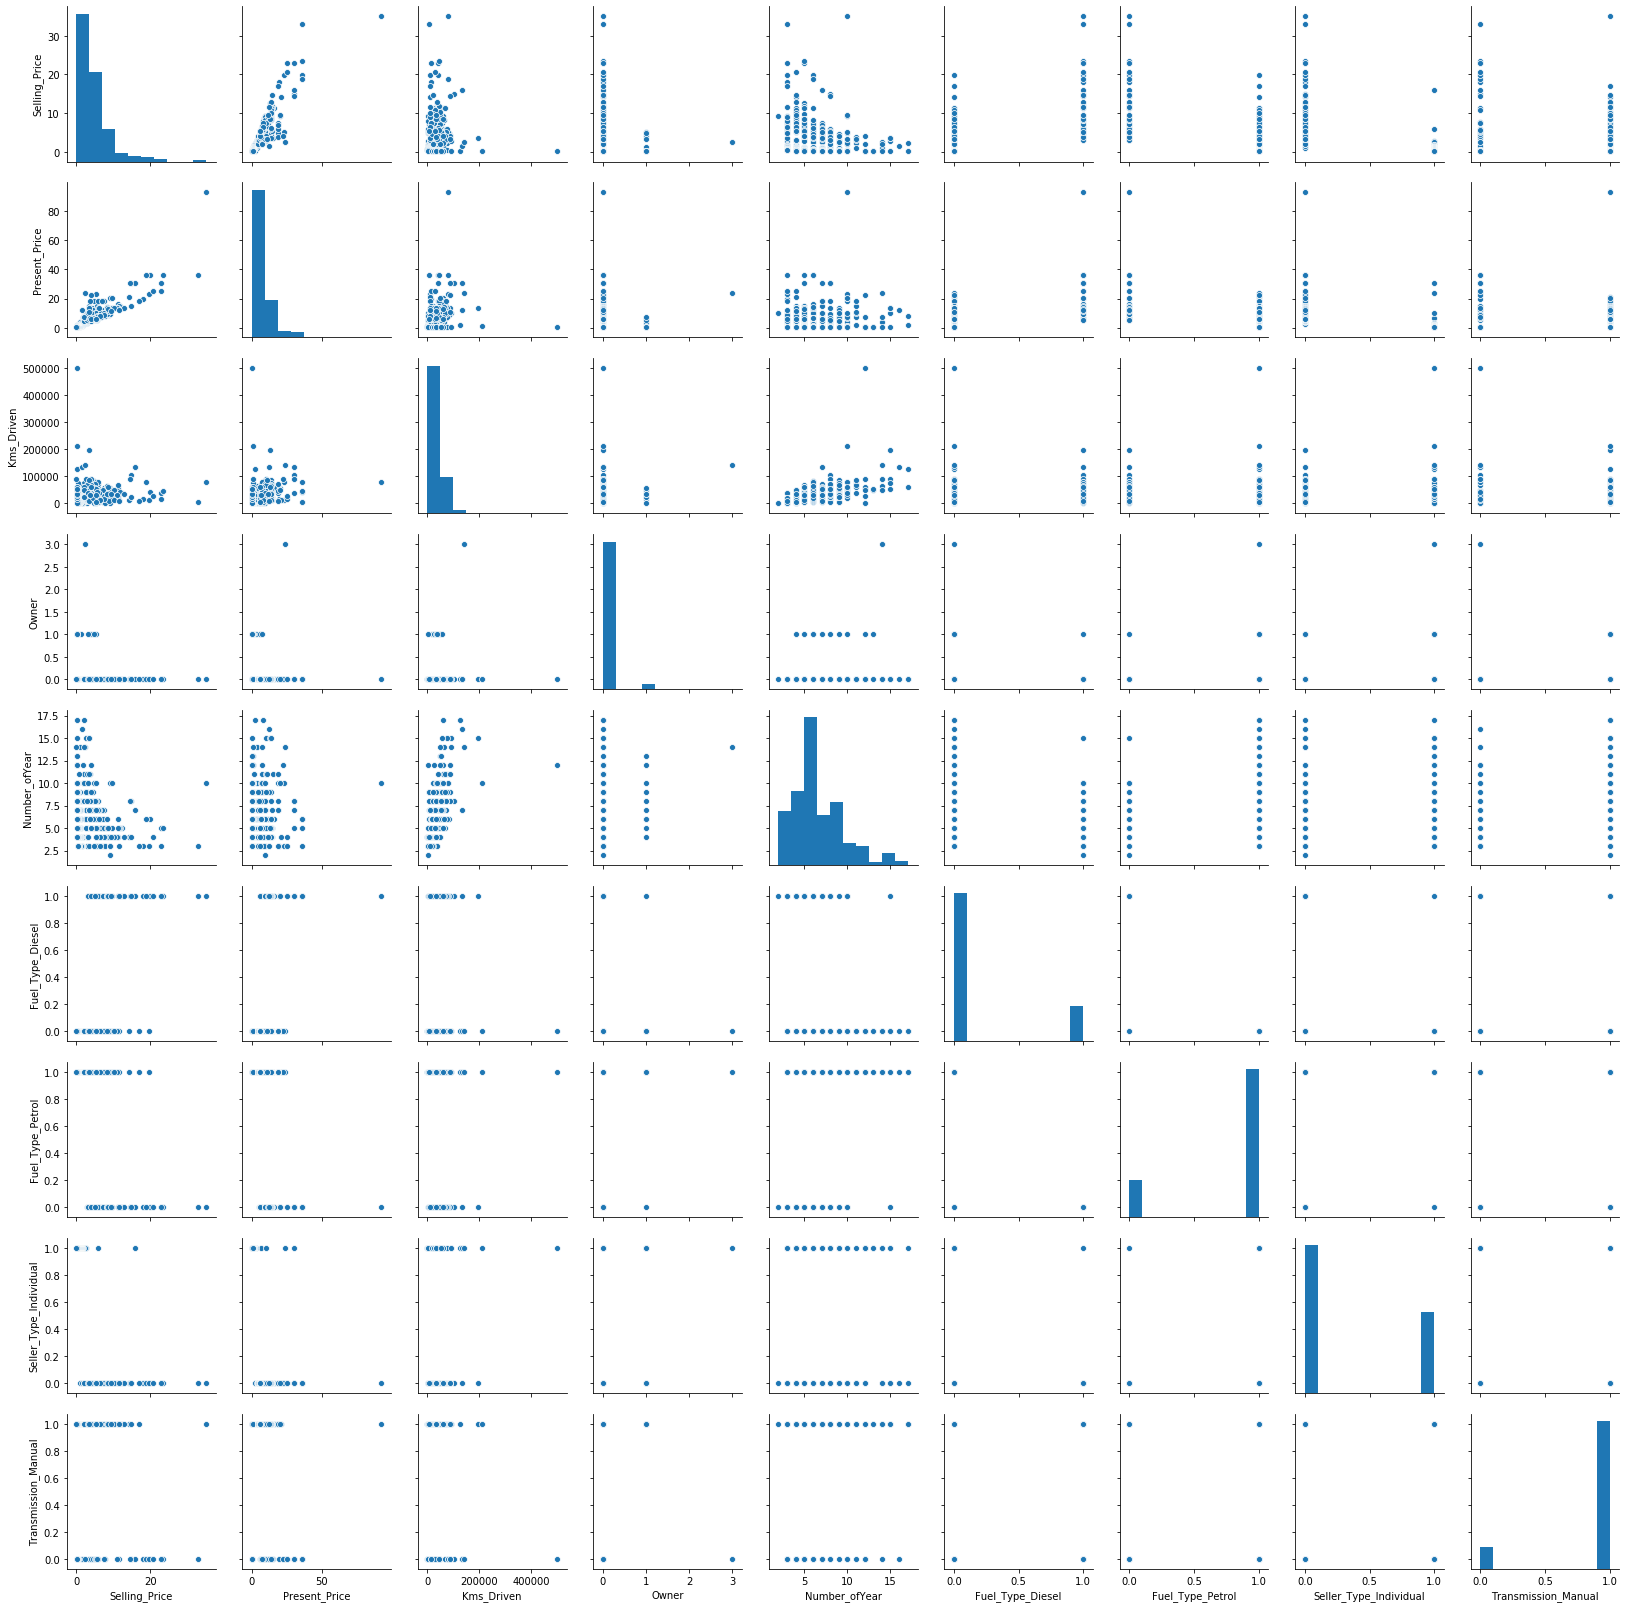

In [26]:
# Plotting using seaborn
sns.pairplot(final_dataset)

#### Inferences:
Not much insight from the pairplot so we will create a heatmap

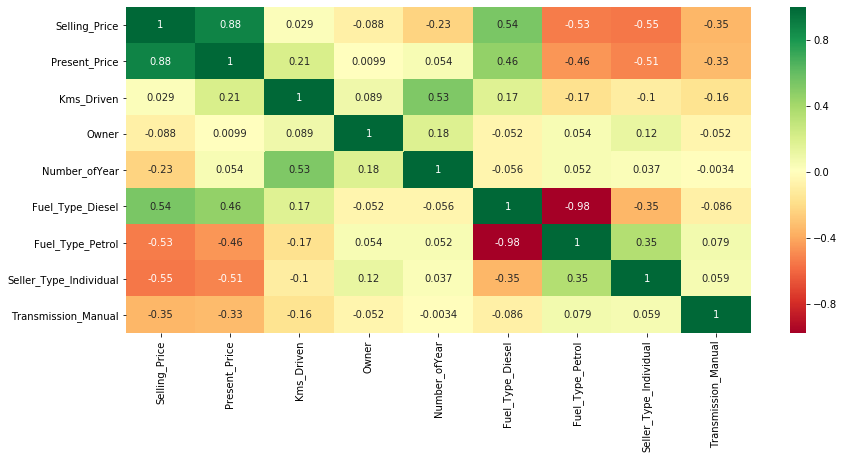

In [27]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index # to know about correlated features

# Plot the heat map
plt.figure(figsize = (14,6))
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

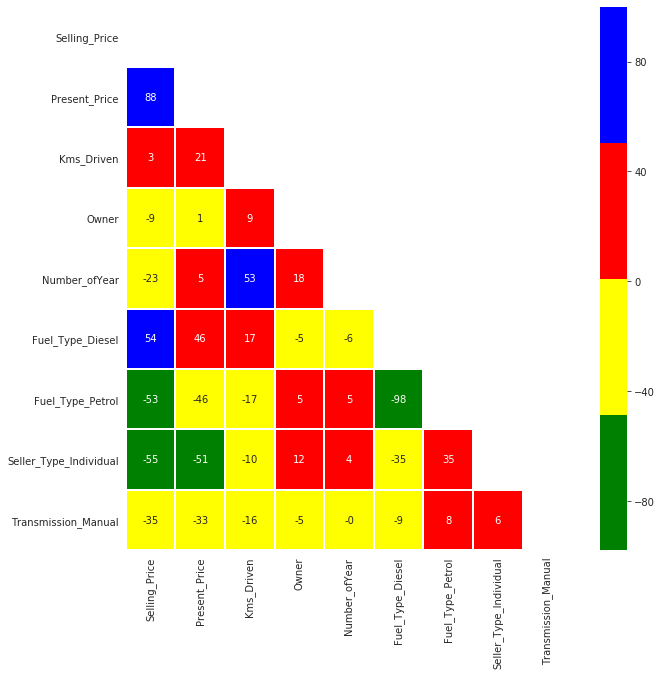

In [28]:
mask=np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(corrmat*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

**What to look for?**
* The colorbar on the right explains the meaning of the heatmap - Dark colors indicate **strong negative correlations** and light colors indicate **strong positive correlations**.
* Perhaps the most helpful way to interpret this correlation heatmap is to first find features that are correlated with the target variable by scanning the first column.
* It doesn't look like many features are strongly correlated with the target variable except Present Price and Fuel_Type diesel.
* Fuel_type_Petrol and seller_type_individual are negatively correlated to selling_price
* Example: there is a negative correlation between Present_Price and seller_type_individual but not strong enough to drop one of the features


### Detecting the outliers

* Outliers can cause problems with certain types of models.
* Boxplots are a nice way to detect outliers
* Let's start with a box plot of your target variable, since that's what you're actually trying to predict.

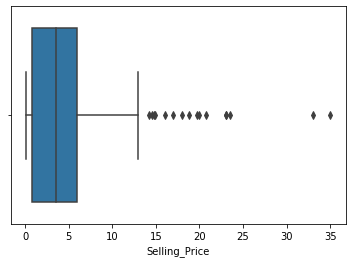

In [29]:
sns.boxplot(final_dataset['Selling_Price'])

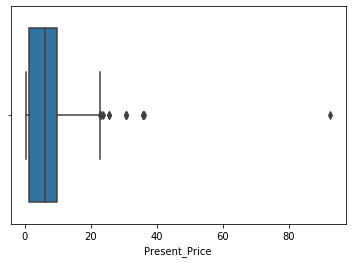

In [30]:
sns.boxplot(final_dataset['Present_Price'])

#### Inference:
* Its visible we have some outliers in our target variable - Selling_Price
* One outlier in Present_price represented by extreme point in the box plot
* Will remove the record from dataset to eliminate the outlier in Present_Price feature

In [31]:
final_dataset.Present_Price.sort_values(ascending=False).head()

86    92.60
64    36.23
59    35.96
62    35.96
63    35.96
Name: Present_Price, dtype: float64

In [32]:
## Remove observations with lot_size greater than 500,000 sqft.
final_dataset = final_dataset[final_dataset.Present_Price <= 60]
final_dataset.shape

(298, 9)

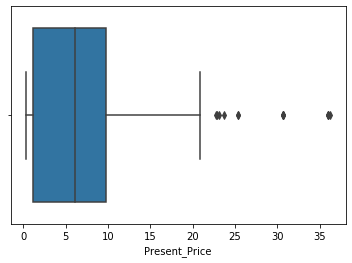

In [33]:
sns.boxplot(final_dataset['Present_Price']);

### Scaling and transformation

In [34]:
from sklearn.preprocessing import RobustScaler

In [35]:
rs = RobustScaler()
for c in final_dataset[['Present_Price', 'Kms_Driven', 'Owner',
       'Number_ofYear', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual']].columns:
    final_dataset[c] = rs.fit_transform(final_dataset[c].values.reshape(-1, 1))
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_ofYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,-0.056675,-0.143022,0.0,0.00,0.0,0.0,0.0,0.0
1,4.75,0.404908,0.333519,0.0,0.25,1.0,-1.0,0.0,0.0
2,7.25,0.441134,-0.741677,0.0,-0.75,0.0,0.0,0.0,0.0
3,2.85,-0.224949,-0.792310,0.0,0.75,0.0,0.0,0.0,0.0
4,4.60,0.092901,0.317138,0.0,0.00,1.0,-1.0,0.0,0.0


In [36]:
'''
cols = final_dataset.drop('Selling_Price', axis = 1).columns
#For models from Sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_dataset = pd.DataFrame(scaler.fit_transform(final_dataset.drop('Selling_Price', axis = 1)), columns = cols)

===== another method-=====


scaled_features = data.copy()
col_names = ['Age', 'Weight']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
print(scaled_features)


'''

"\ncols = final_dataset.drop('Selling_Price', axis = 1).columns\n#For models from Sklearn\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nfinal_dataset = pd.DataFrame(scaler.fit_transform(final_dataset.drop('Selling_Price', axis = 1)), columns = cols)\n\n===== another method-=====\n\n\nscaled_features = data.copy()\ncol_names = ['Age', 'Weight']\nfeatures = scaled_features[col_names]\nscaler = StandardScaler().fit(features.values)\nfeatures = scaler.transform(features.values)\nscaled_features[col_names] = features\nprint(scaled_features)\n\n\n"

In [37]:
final_dataset.tail(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_ofYear,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
296,9.50,0.645632,0.065107,0.0,-0.50,1.0,-1.0,0.0,0.0
297,4.00,-0.020450,0.839845,0.0,-0.25,0.0,0.0,0.0,0.0
298,3.35,0.575519,1.671827,0.0,1.25,0.0,0.0,0.0,0.0
299,11.50,0.750803,-0.679131,0.0,-0.75,1.0,-1.0,0.0,0.0
300,5.30,-0.020450,-0.784447,0.0,-0.50,0.0,0.0,0.0,0.0


## Predictive Models

In [38]:
# Selling Price will be the target variable 
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [39]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(223, 8) (75, 8) (223,) (75,)


## Model-1. Logistic Regression

In [40]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

## Predict Train results
y_train_pred = linreg.predict(X_train)
print("Train Results for Linear Regression Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

print('\n')

## Predict Test results
y_pred = linreg.predict(X_test)
print("Test Results for linear Regression Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))       # same as linreg.score(X_test,y_test)
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for Linear Regression Model:
*******************************
Root mean squared error:  1.6395881241811803
R-squared:  0.8840704587388536
Mean Absolute Error:  1.1088801393297814


Test Results for linear Regression Model:
*******************************
Root mean squared error:  1.6755843950857499
R-squared:  0.838424612747327
Mean Absolute Error:  1.2493942585868434


## Model-2: Ridge Regression

In [41]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
ridge_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_absolute_error')

In [42]:
ridge_model.best_estimator_

Ridge(alpha=10)

In [43]:
## Predict Train results
y_train_pred = ridge_model.predict(X_train)

## Predict Test results
y_pred = ridge_model.predict(X_test)

In [44]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))
print('\n')
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  1.668309008486455
R-squared:  0.8799733792254965
Mean Absolute Error:  1.105669955647812


Test Results for Ridge Regression:
*******************************
Root mean squared error:  1.6514370562004352
R-squared:  0.8430480766306563
Mean Absolute Error:  1.2311782854965259


### Feature importance in this model

In [45]:
## Building the model again with the best hyperparameters
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [46]:
indices = np.argsort(-abs(ridge_model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Present_Price
Number_ofYear
Fuel_Type_Diesel
Transmission_Manual
Fuel_Type_Petrol
Owner
Seller_Type_Individual
Kms_Driven


## Model-3: Lasso Regression

In [47]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, ]}
lasso_model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
lasso_model.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_absolute_error')

In [48]:
lasso_model.best_estimator_

Lasso(alpha=0.1)

In [49]:
# Predict Train results
y_train_pred = lasso_model.predict(X_train)

# Predict Test results
y_pred = lasso_model.predict(X_test)

In [50]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))
print('\n')
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  1.72648558687752
R-squared:  0.8714563866934513
Mean Absolute Error:  1.1152785316055185


Test Results for Lasso Regression:
*******************************
Root mean squared error:  1.6242511956915737
R-squared:  0.8481730101803796
Mean Absolute Error:  1.1829586240679175


### Feature importance in this model

In [51]:
## Building the model again with the best hyperparameters
lasso_model = Lasso(alpha= 0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [52]:
indices = np.argsort(-abs(lasso_model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Present_Price
Number_ofYear
Fuel_Type_Diesel
Kms_Driven
Owner
Fuel_Type_Petrol
Seller_Type_Individual
Transmission_Manual


## Model-4: Random Forest Regression

In [53]:
## Reference: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

tuned_params = {'n_estimators': [100, 200, 300, 400], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='neg_mean_absolute_error')

In [54]:
## Predict Train results
y_train_pred = rf_model.predict(X_train)

## Predict Test results
y_pred = rf_model.predict(X_test)

In [55]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))
print('\n')
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  0.49766457217260396
R-squared:  0.9893193412414691
Mean Absolute Error:  0.24143497757847526


Test Results for Random Forest Regression:
*******************************
Root mean squared error:  0.7195511997650595
R-squared:  0.970203449139412
Mean Absolute Error:  0.43778266666666593


In [56]:
rf_model.best_params_

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1}

### Feature importance for this model

In [57]:
## Building the model again with the best hyperparameters
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [58]:
indices = np.argsort(-rf_model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Present_Price
Number_ofYear
Kms_Driven
Seller_Type_Individual
Transmission_Manual
Fuel_Type_Diesel
Fuel_Type_Petrol
Owner


#### Inference:
* For train set, the score we obtain is 0.98 for random forest model which has performed best.
* For test set, the score we obtain is 0.96 and also from this we can say model is not overfitting.

## Model-5 XGBoost Regression

In [59]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
xg_model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
xg_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [60]:
## Predict Train results
y_train_pred = xg_model.predict(X_train)

## Predict Test results
y_pred = xg_model.predict(X_test)

In [61]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

print('\n')

print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  0.18550397043441777
R-squared:  0.9985160098841751
Mean Absolute Error:  0.13312153565509435


Test Results for XGBoost Regression:
*******************************
Root mean squared error:  0.9328192215217663
R-squared:  0.9499230852142702
Mean Absolute Error:  0.5152974209308624


In [62]:
xg_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
## Building the model again with the best hyperparameters
xg_model = XGBRegressor(max_depth=3,learning_rate=0.1,n_estimators=100, reg_lambda=0.1)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
## Function also includes figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def xgboost_plot_importance(booster, figsize, **kwargs): 
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

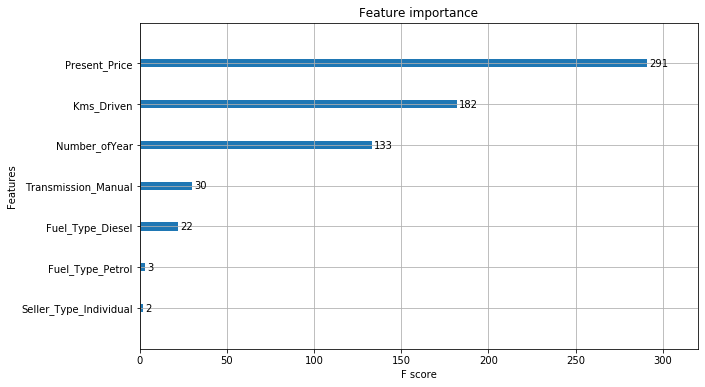

In [65]:
xgboost_plot_importance(xg_model, (10,6))

## Model-6 Descision Tree Regression

In [66]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
dt_model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
dt_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='neg_mean_absolute_error')

In [67]:
## Predict Train results
y_train_pred = dt_model.predict(X_train)

## Predict Test results
y_pred = dt_model.predict(X_test)

In [68]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

print('\n')

print("Test Results for Decision Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  0.6445419456501416
R-squared:  0.9820845813686206
Mean Absolute Error:  0.36972604326415986


Test Results for Decision Regression:
*******************************
Root mean squared error:  1.276530376530498
R-squared:  0.9062211508153852
Mean Absolute Error:  0.6816607599807598


### Feature imortance for this model

In [69]:
print(dt_model.best_params_)

{'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 6}


In [70]:
## Building the model again with the best hyperparameters
dt_model = DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=1, max_depth= 6)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=3)

In [71]:
indices = np.argsort(-dt_model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Present_Price
Number_ofYear
Kms_Driven
Fuel_Type_Petrol
Transmission_Manual
Owner
Fuel_Type_Diesel
Seller_Type_Individual


#### Inferences:
* Decision Tree model is also performing well
* But it is evident that that model is overfitting to training data.

## Model-7: KN Regression

In [72]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 3.


In [73]:
kn_model = KNeighborsRegressor(n_neighbors = optimal_k)
kn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [74]:
## Predict Train results
y_train_pred = kn_model.predict(X_train)

## Predict Test results
y_pred = kn_model.predict(X_test)

In [75]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

print('\n')

print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for KN Regression:
*******************************
Root mean squared error:  0.9448944178514848
R-squared:  0.9614973026109189
Mean Absolute Error:  0.528086696562033


Test Results for KN Regression:
*******************************
Root mean squared error:  1.0364277681143625
R-squared:  0.9381811856005448
Mean Absolute Error:  0.6634666666666668


## Model-8: Support Vector Regression

In [76]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
svr_model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
svr_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_absolute_error')

In [77]:
svr_model.best_estimator_

SVR(C=100, gamma=0.1)

In [78]:
## Predict Train results
y_train_pred = svr_model.predict(X_train)
## Predict Test results
y_pred = svr_model.predict(X_test)

In [79]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

print('\n')

print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  0.5028451018685622
R-squared:  0.9890958193575721
Mean Absolute Error:  0.3251862280010283


Test Results for Support Vector Regression:
*******************************
Root mean squared error:  0.6746238767175693
R-squared:  0.9738081601102486
Mean Absolute Error:  0.4170389626572799


#### Inferences:
* feature importance from RBF SVM is non trivial
* SVR model is also preforming well

## Model-9: Extra Tree Regressor

In [80]:
tuned_params = {'n_estimators': [100, 200, 300, 400], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
tree_model = RandomizedSearchCV(ExtraTreesRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
tree_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='neg_mean_absolute_error')

In [81]:
## Predict Train results
y_train_pred = tree_model.predict(X_train)

## Predict Test results
y_pred = tree_model.predict(X_test)

In [82]:
print("Train Results for Extra Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))
print('\n')
print("Test Results for Extra Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for Extra Tree Regression:
*******************************
Root mean squared error:  5.0846110002153624e-15
R-squared:  1.0
Mean Absolute Error:  2.6558227465752903e-15


Test Results for Extra Tree Regression:
*******************************
Root mean squared error:  0.6876760033620489
R-squared:  0.9727848751554384
Mean Absolute Error:  0.3986026666666672


### Feature importance for this model

In [83]:
print(tree_model.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [84]:
## Building the model again with the best hyperparameters
tree_model = ExtraTreesRegressor(n_estimators=400, min_samples_split=2, min_samples_leaf=1)
tree_model.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=400)

In [85]:
indices = np.argsort(-tree_model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Present_Price
Seller_Type_Individual
Number_ofYear
Fuel_Type_Diesel
Transmission_Manual
Kms_Driven
Fuel_Type_Petrol
Owner


### Inferences:
* Among all the models Extra tree regressor is performing best as rmse, mae for train and test data is least.
* But also we need to be sure that model is not overfiting as R2 score for train data is 1.

## Model-10 : Voting Model
* For regression, a voting ensemble involves making a prediction that is the average of multiple other regression models.
* Here we will be using 3 models we build before: ExtrTreeRegressor , XGBoostRegressor, RandomForestRegressor 

In [86]:
from sklearn.ensemble import VotingRegressor

# soft voting based on weights
votes = [('tree', tree_model),('xgb', xg_model),('rf', rf_model)]
Vote_model = VotingRegressor(estimators=votes, n_jobs=-1)
Vote_model.fit(X_train, y_train)

VotingRegressor(estimators=[('tree', ExtraTreesRegressor(n_estimators=400)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=0,
                                         

In [87]:
## Predict Train results
y_train_pred = Vote_model.predict(X_train)

## Predict Test results
y_pred = Vote_model.predict(X_test)

In [88]:
print("Train Results for Voted Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))
print('\n')
print("Test Results for Voted Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Train Results for Voted Model:
*******************************
Root mean squared error:  0.22590361536108614
R-squared:  0.9977992487752506
Mean Absolute Error:  0.14322290494958756


Test Results for Voted Model:
*******************************
Root mean squared error:  0.6553569949813965
R-squared:  0.9752828456365318
Mean Absolute Error:  0.4038420818858685


### Inferences:
* The Voting Model is best to use as it captures the strength of each model for prediction and also provides stability by taking the average of model results.
* This also evident from our model as score of train and test data do not vary alot.
* Voted model also takes care of __Overfitting__
* Voting is useful when models used in the ensemble have generally the same good performance.


### Save the model to use it in production or for PAAS

In [89]:
with open('CarPrice_Prediction.pkl', 'wb') as pickle_file:
       joblib.dump(Vote_model, 'CarPrice_Prediction.pkl') 